In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = r"C:\Users\91932\OneDrive\Desktop\FDIP research paper\scenery.jpg"
if not os.path.exists(path):
    raise FileNotFoundError(f"Image not found at: {path}")

In [3]:
img_color_bgr = cv2.imread(path, cv2.IMREAD_COLOR)
if img_color_bgr is None:
    raise ValueError("cv2.imread returned None for the color image.")

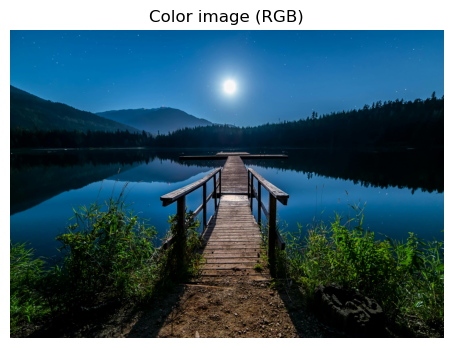

In [4]:
img_color_rgb = cv2.cvtColor(img_color_bgr, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6, 4))
plt.axis("off")
plt.title("Color image (RGB)")
plt.imshow(img_color_rgb)
plt.show()


In [5]:
img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("cv2.imread returned None for the grayscale image.")


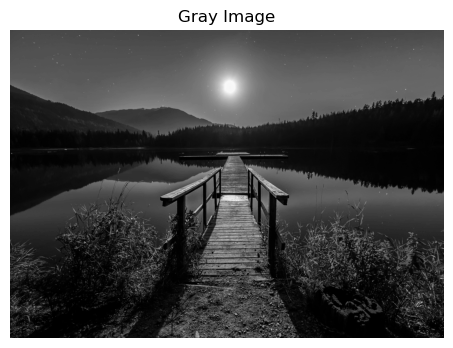

In [6]:
cv2.imwrite("sunset_gray.jpg", img)

plt.figure(figsize=(6, 4))
plt.imshow(img, cmap="gray")
plt.title("Gray Image")
plt.axis("off")
plt.show()


In [7]:
bright_up   = cv2.convertScaleAbs(img, alpha=1.0, beta=+50)
bright_down = cv2.convertScaleAbs(img, alpha=1.0, beta=-50)

_, thresh = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
negative = 255 - img


In [8]:
c = 255.0 / np.log(1.0 + np.max(img))
log_trans = c * np.log(1.0 + img.astype(np.float32))
log_trans = np.clip(log_trans, 0, 255).astype(np.uint8)


In [9]:
gamma = 0.5
gamma_corrected = np.clip(
    255.0 * ((img.astype(np.float32) / 255.0) ** gamma),
    0,
    255
).astype(np.uint8)

In [10]:
r1, r2 = 50, 60
c1, c2 = 50, 60
H, W = img.shape[:2]
r1, r2 = max(0, r1), min(H, r2)
c1, c2 = max(0, c1), min(W, c2)

In [11]:
print("Original Gray pixel values (50:60, 50:60):\n", img[r1:r2, c1:c2])
print("\nBrightness Increased pixel values:\n", bright_up[r1:r2, c1:c2])
print("\nBrightness Reduced pixel values:\n", bright_down[r1:r2, c1:c2])
print("\nThresholded pixel values:\n", thresh[r1:r2, c1:c2])
print("\nNegative pixel values:\n", negative[r1:r2, c1:c2])
print("\nLog Transform pixel values:\n", log_trans[r1:r2, c1:c2])
print("\nGamma(0.5) Transform pixel values:\n", gamma_corrected[r1:r2, c1:c2])


Original Gray pixel values (50:60, 50:60):
 [[71 71 71 71 71 71 71 71 71 71]
 [71 71 71 71 71 71 71 71 71 71]
 [71 71 71 71 71 71 71 71 71 71]
 [71 71 71 71 71 71 71 71 71 71]
 [71 71 71 71 71 71 71 71 71 71]
 [71 71 71 71 71 71 71 71 71 71]
 [71 71 71 71 71 71 71 71 71 71]
 [71 71 71 71 71 71 71 71 71 71]
 [71 71 71 71 71 71 71 71 71 71]
 [71 71 71 71 71 71 71 71 71 71]]

Brightness Increased pixel values:
 [[121 121 121 121 121 121 121 121 121 121]
 [121 121 121 121 121 121 121 121 121 121]
 [121 121 121 121 121 121 121 121 121 121]
 [121 121 121 121 121 121 121 121 121 121]
 [121 121 121 121 121 121 121 121 121 121]
 [121 121 121 121 121 121 121 121 121 121]
 [121 121 121 121 121 121 121 121 121 121]
 [121 121 121 121 121 121 121 121 121 121]
 [121 121 121 121 121 121 121 121 121 121]
 [121 121 121 121 121 121 121 121 121 121]]

Brightness Reduced pixel values:
 [[21 21 21 21 21 21 21 21 21 21]
 [21 21 21 21 21 21 21 21 21 21]
 [21 21 21 21 21 21 21 21 21 21]
 [21 21 21 21 21 21 21 

In [12]:
titles = ['Original','Bright+','Bright-','Threshold','Negative','Log','Gamma(0.5)']
images = [img, bright_up, bright_down, thresh, negative, log_trans, gamma_corrected]

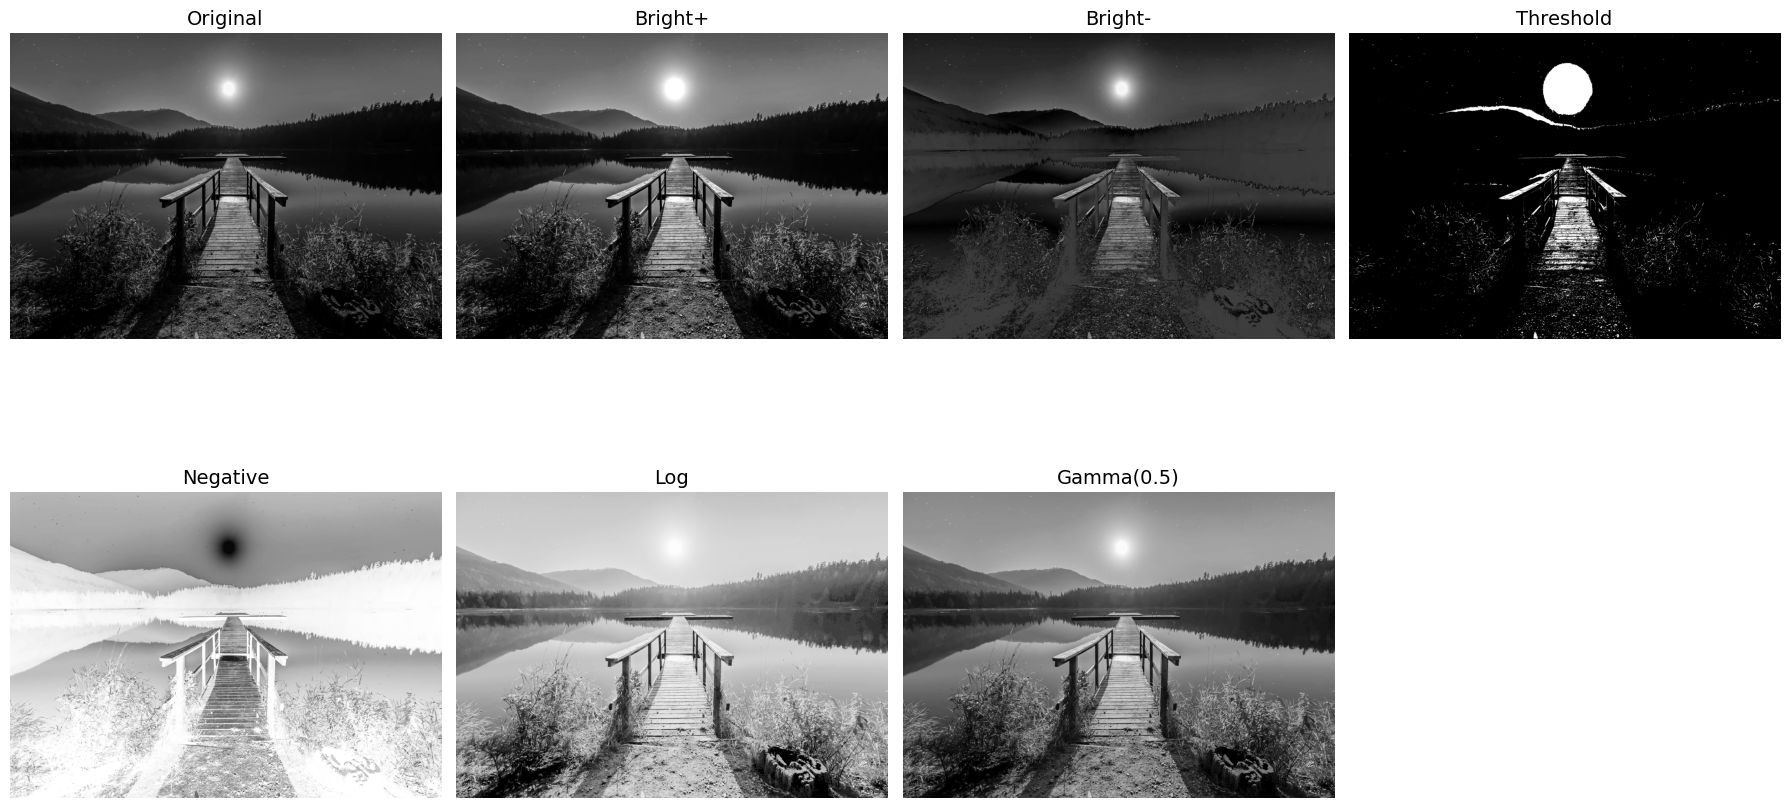

In [13]:
plt.figure(figsize=(18, 10))
for i, (title, im) in enumerate(zip(titles, images)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(im, cmap='gray')
    plt.title(title, fontsize=14)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [14]:
print("Shape:", img.shape)
print("Dtype:", img.dtype)


Shape: (3770, 5306)
Dtype: uint8
